# Lower Back Pain
Lower back pain, also called lumbago, is not a disorder. It’s a symptom of several different types of medical problems. It usually results from a problem with one or more parts of the lower back, such as:

ligaments
muscles
nerves
the bony structures that make up the spine, called vertebral bodies or vertebrae
Lower back pain can also be due to a problem with nearby organs, such as the kidneys.

According to the American Association of Neurological Surgeons, 75 to 85 percent of Americans will experience back pain in their lifetime. Of those, 50 percent will have more than one episode within a year. In 90 percent of all cases, the pain gets better without surgery. Talk to your doctor if you’re experiencing back pain.

In this Exploratory Data Analysis (EDA) I am going to use the Lower Back Pain Symptoms Dataset and try to find out interesting insights of this dataset.

# Dataset Description


This dataset contains:

310 Observations
12 Features
1 Lebel

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
dataset = pd.read_csv("Dataset_spine.csv")

In [3]:
dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
# Unnecessary column
dataset.iloc[:,-1:].head()

,Unnamed: 13
0,NaN
1,NaN
2,Prediction is done by using binary classificat...
3,NaN
4,NaN


In [5]:
# removing Unnecessary column
del dataset["Unnamed: 13"]

# Full Dataset Summary
DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values.

Now, let's understand the statistics that are generated by the describe() method:

1. count tells us the number of NoN-empty rows in a feature.

2. mean tells us the mean value of that feature.

3. std tells us the Standard Deviation Value of that feature.

4. min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.

6. max tells us the maximum value of that feature.

In [6]:
dataset.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [7]:
# Change the Column names
dataset.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [8]:
dataset.head()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [9]:
dataset.shape

(310, 13)

DataFrame.info() prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. We can use the info() to know whether a dataset contains any missing value or not.

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
class                       310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


# Visualize the number of abnormal and normal cases
The tendency of abnormal cases is 2 times higher than the normal cases.



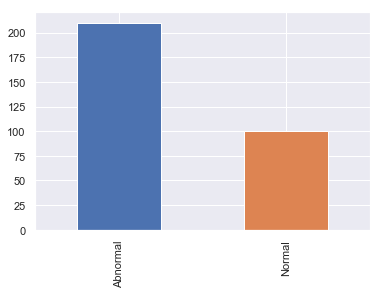

In [11]:
dataset["class"].value_counts().sort_index().plot.bar()

# Correlation between features
A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between two variables.

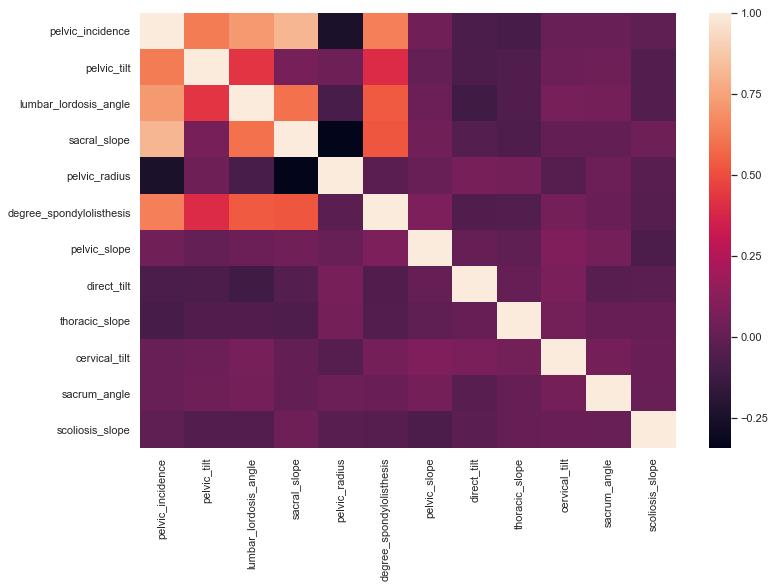

In [12]:

plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr())

# Custom correlogram
A pair plot allows us to see both distribution of single variables and relationships between two variables.

Lots of things are going on in the below pair plot. Let’s try to understand the pair plot. In pair plot, there are mainly two things that we need to understand. One is the distribution of a feature and another is the relationship between one feature to all others. 

If we look at the diagonal we can see the distribution of each feature. Let’s consider the first row X first column, this diagonal shows us the distribution of pelvic_incidence. Similarly, if we look at the second row X second column diagonal we can see the distribution of pelvic_tilt. 

All the cells except the diagonals show the relationship between one feature to another. Let’s consider the first row X second column, here we can the relationship between pelvic_incidence and pelvic_tilt.

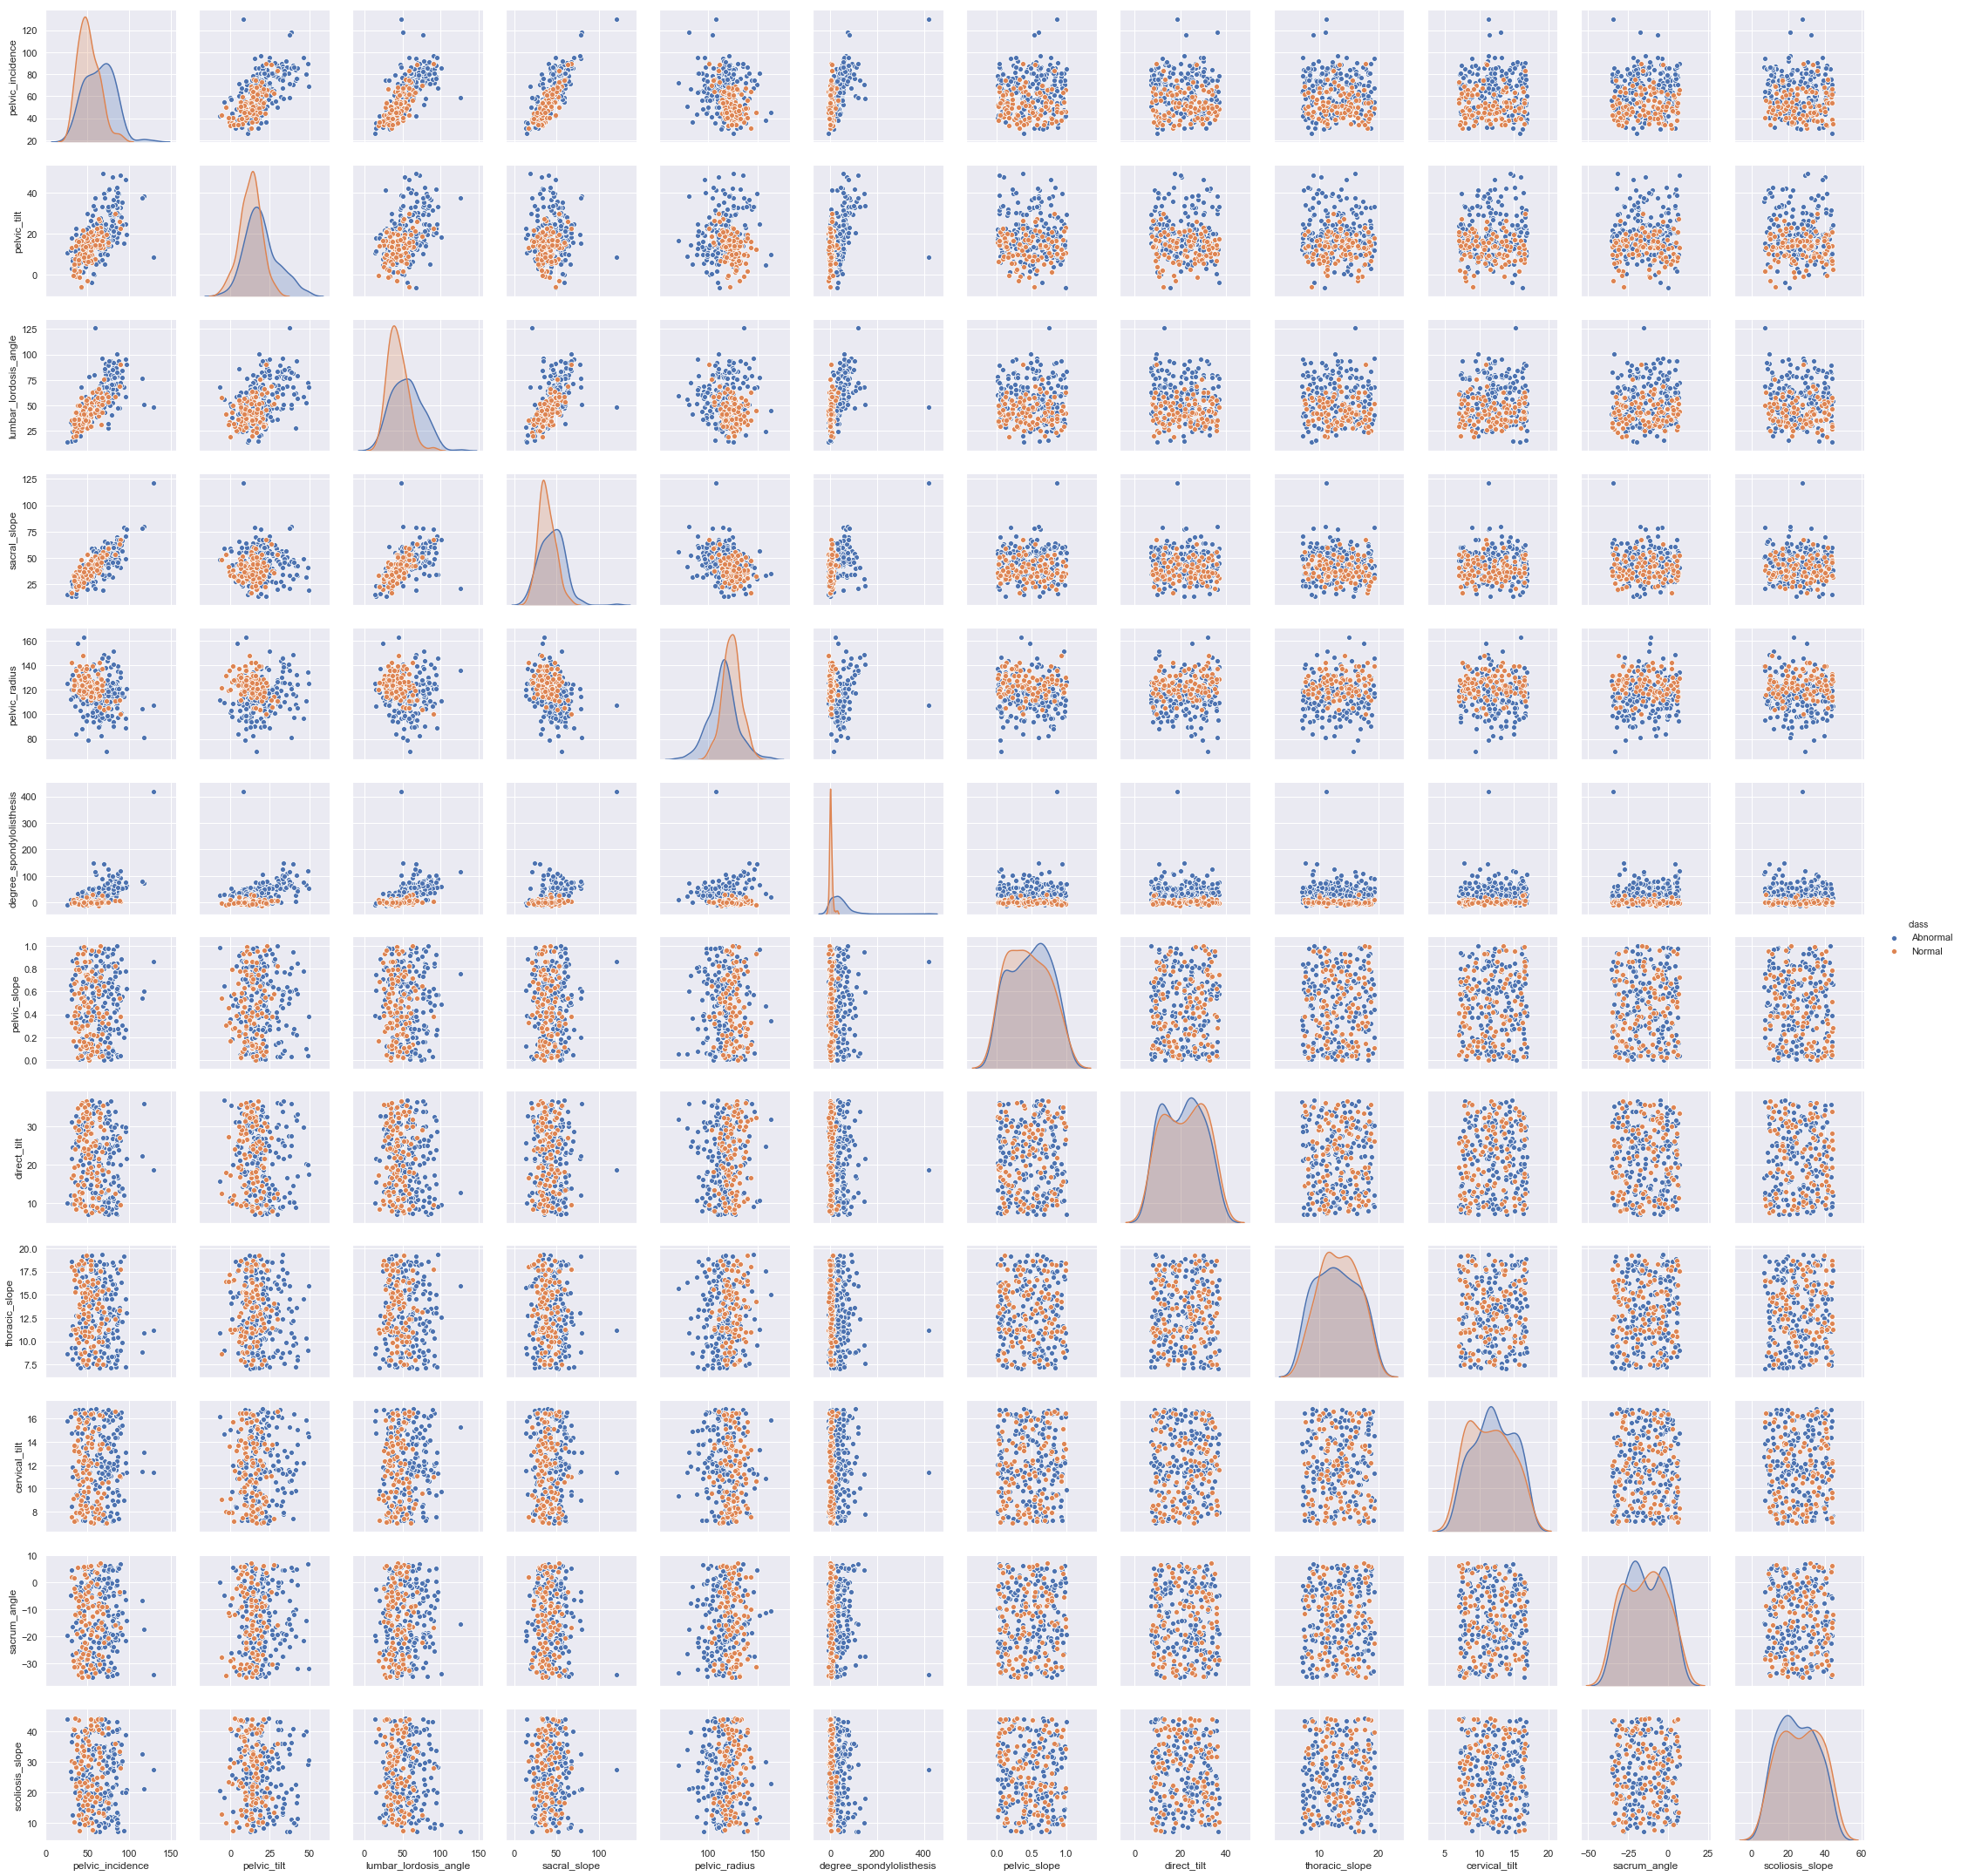

In [13]:
sns.pairplot(dataset, hue="class")

# Histogram of Each Feature
A Histogram is the most commonly used graph to show frequency distributions.

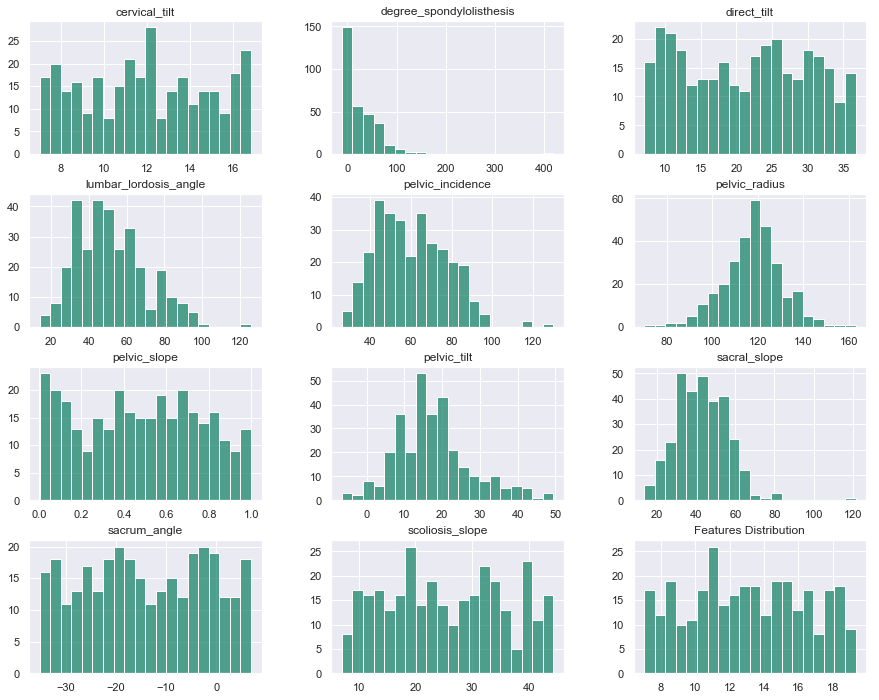

In [14]:
dataset.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

# Detecting and Removing Outliers


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

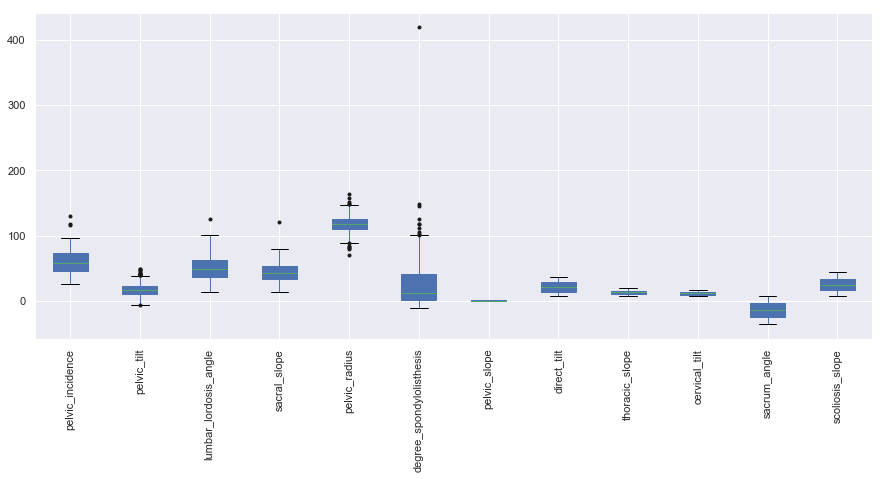

In [15]:
plt.subplots(figsize=(15,6))
dataset.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

# Detect and Remove Outliers by hand

In [16]:
# detecting Outlier
# Inter Quartile Range is the distance between the 3rd Quartile and the first Qartile

minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [17]:
# we use tukey method to remove outliers.
# whiskers are set at 1.5 times Interquartile Range (IQR

def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

# taking all the columns except the last one
# last column is the label

X = dataset.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [18]:
X = dataset.iloc[:, :-1]

In [19]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

pelvic_incidence Contains Outlier
pelvic_tilt Contains Outlier
lumbar_lordosis_angle Contains Outlier
sacral_slope Contains Outlier
pelvic_radius Contains Outlier
degree_spondylolisthesis Contains Outlier


In [20]:
for i in range (3):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

# After removing Outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

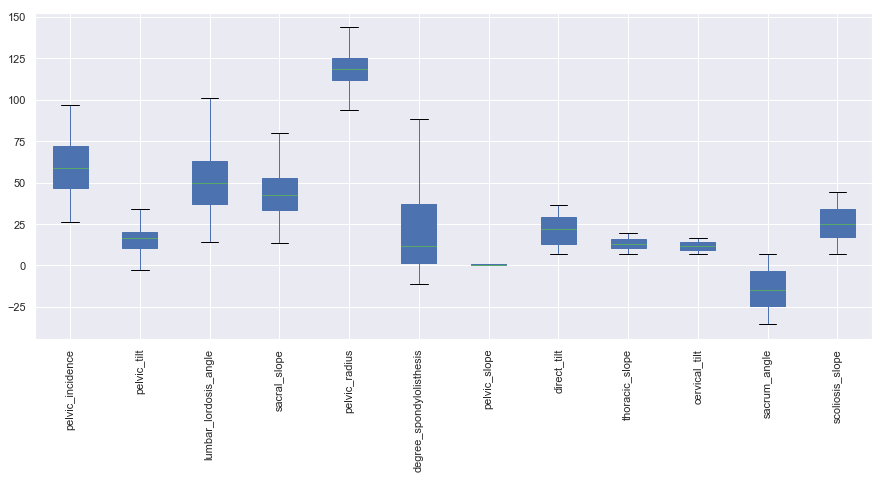

In [21]:
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

# Feature Scaling
Feature scaling though standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Our dataset contain features with highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this will create a problem. To avoid this effect, we need to bring all features to the same level of magnitudes. This can be acheived by feature scaling.

In [22]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.523049,0.684601,0.295226,0.408699,0.099877,0.108734,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797
1,0.183082,0.349535,0.126987,0.235632,0.415357,0.157231,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812
2,0.605368,0.675639,0.416076,0.501244,0.246507,0.075764,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166
3,0.611962,0.740938,0.349432,0.471552,0.163957,0.224132,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741
4,0.334210,0.338566,0.165053,0.402451,0.290294,0.190990,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711


# Label Encoding
Certain algorithms like XGBoost can only have numerical values as their predictor variables. Hence we need encode our categorical values. LabelEncoder from sklearn.preprocessing package encode labels with value between 0 and n_classes-1.

In [23]:
label = dataset["class"]

In [24]:
encoder = LabelEncoder()
label = encoder.fit_transform(label)


In [25]:
X = scaled_df
y = label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [26]:
clf_gnb = GaussianNB()
pred_gnb = clf_gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_gnb, y_test)

0.80851063829787229

In [27]:
clf_svc = SVC(kernel="linear")
pred_svc = clf_svc.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_svc, y_test)

0.78723404255319152

In [28]:
clf_xgb =  XGBClassifier()
pred_xgb = clf_xgb.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_xgb, y_test)

0.82978723404255317

In [29]:
confusion_matrix(pred_xgb, y_test)

array([[29,  6],
       [ 2, 10]], dtype=int64)

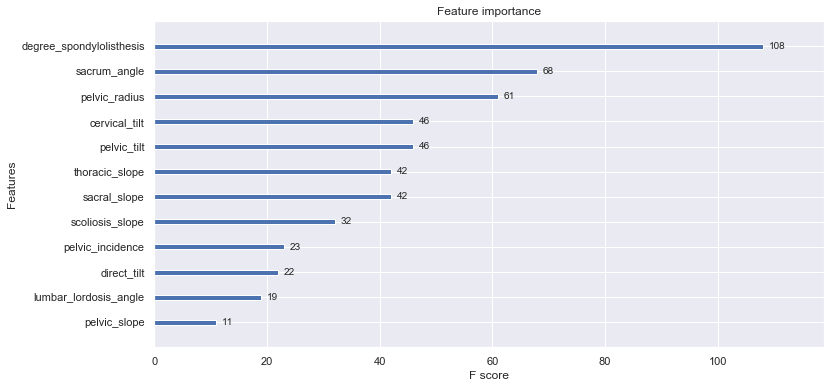

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_importance(clf_xgb, ax=ax)

# Marginal plot
A marginal plot allows to study the relationship between 2 numeric variables. The central chart display their correlation.

Lets visualize the relationship between degree_spondylolisthesis and class.

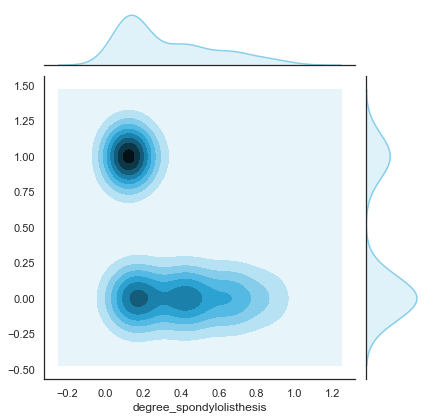

In [31]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=X["degree_spondylolisthesis"], y=label, kind='kde', color="skyblue")